<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('timeseries.xlsx')
df.head()

,DEVICE_ID,DENOMINATION,DATE,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP
0,ATM008,OMR5,2022-03-01,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0
1,ATM008,OMR5,2022-03-02,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0
2,ATM008,OMR5,2022-03-03,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0
3,ATM008,OMR5,2022-03-04,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0
4,ATM008,OMR5,2022-03-05,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format = '%d-%m-%Y')
df.index.freq = 'MS'
df.set_index(['DATE'],inplace = True)
df.tail()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP
DATE,,,,,,,,,,,,,,,,,
2023-02-24,ATM008,OMR50,24,2,2023,1,0,0,1,Y,362,6,2,0.134103,0,3,362.0
2023-02-25,ATM008,OMR50,25,2,2023,1,0,0,1,Y,308,7,2,0.159318,0,3,308.0
2023-02-26,ATM008,OMR50,26,2,2023,0,1,0,0,Y,378,1,2,0.355066,0,3,378.0
2023-02-27,ATM008,OMR50,27,2,2023,0,1,0,0,Y,508,2,2,0.978302,0,3,508.0
2023-02-28,ATM008,OMR50,28,2,2023,0,1,0,0,N,9,3,2,35.875000,1,3,308.0


<Axes: xlabel='DATE'>

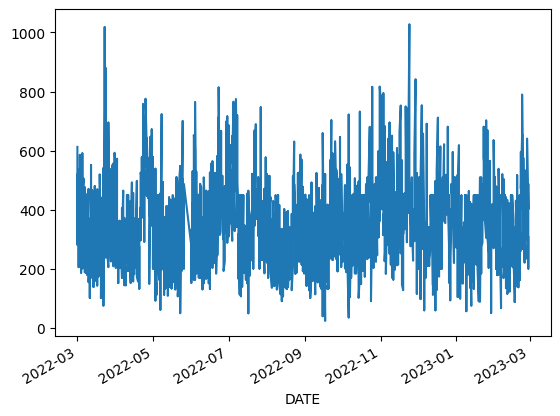

In [8]:
df['AMT_IMP'].plot()

<Axes: xlabel='DATE', ylabel='AMT_IMP'>

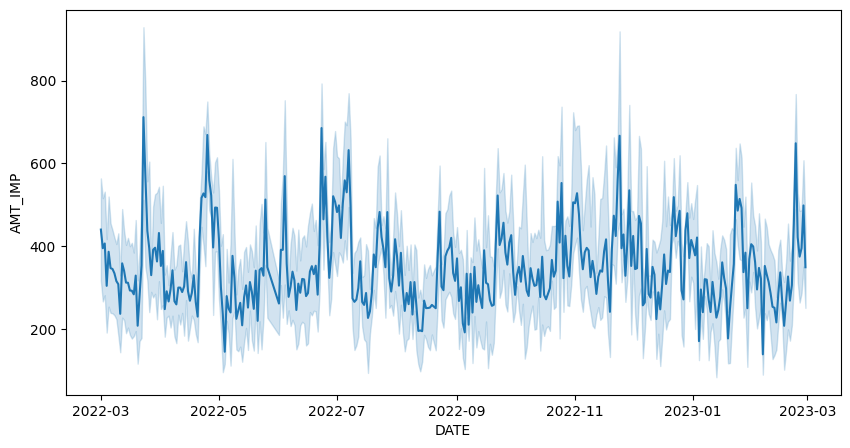

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x=df.index,y =df['AMT_IMP'] )

In [9]:
df.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10',
               ...
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
               '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', name='DATE', length=1436, freq=None)

<Axes: xlabel='DATE'>

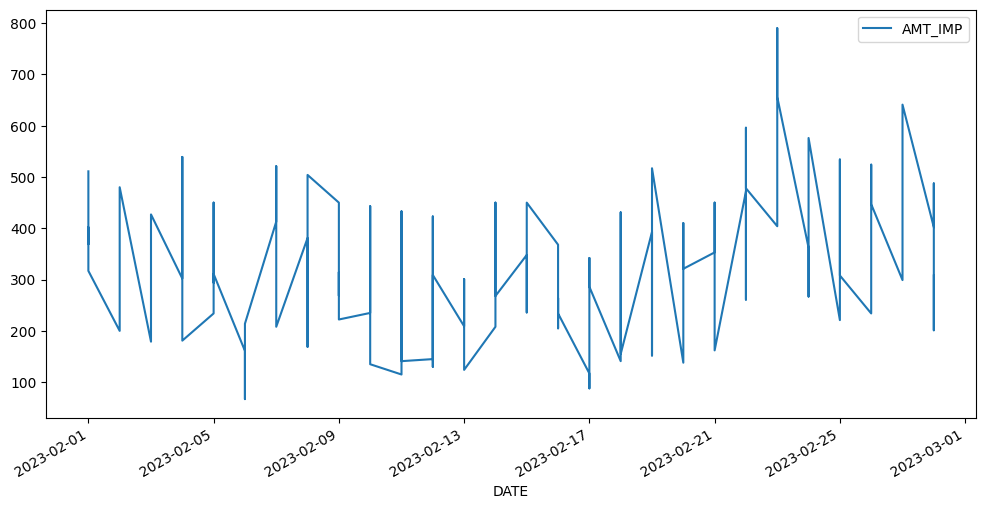

In [13]:
df['AMT_IMP']['2023-02-01':].plot(figsize=(12,6),legend=True)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df = pd.read_excel('timeseries.xlsx',index_col='DATE',parse_dates=True)
df = df.dropna()

In [18]:
df.head()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP
DATE,,,,,,,,,,,,,,,,,
2022-03-01,ATM008,OMR5,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0
2022-03-02,ATM008,OMR5,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0
2022-03-03,ATM008,OMR5,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0
2022-03-04,ATM008,OMR5,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0
2022-03-05,ATM008,OMR5,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0


In [23]:
df['20-day-SMA'] = df['AMT_IMP'].rolling(window=20).mean()

In [24]:
df['28-day-SMA'] = df['AMT_IMP'].rolling(window=28).mean()

<Axes: xlabel='DATE'>

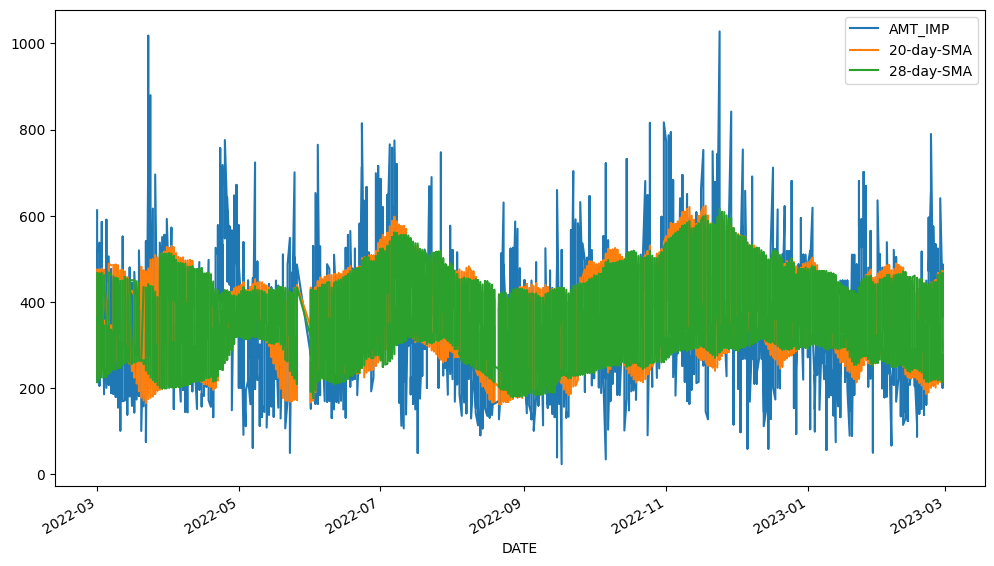

In [30]:
df[['AMT_IMP','20-day-SMA','28-day-SMA']].plot(figsize=(12,7))

In [31]:
df['date'] = pd.to_datetime({'year':df['YEAR'],'month':df['MONTH'],'day':df['DAY']})

In [32]:
df.head()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP,20-day-SMA,28-day-SMA,date
DATE,,,,,,,,,,,,,,,,,,,,
2022-03-01,ATM008,OMR5,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0,NaN,NaN,2022-03-01
2022-03-02,ATM008,OMR5,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0,NaN,NaN,2022-03-02
2022-03-03,ATM008,OMR5,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0,NaN,NaN,2022-03-03
2022-03-04,ATM008,OMR5,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0,NaN,NaN,2022-03-04
2022-03-05,ATM008,OMR5,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0,NaN,NaN,2022-03-05


In [34]:
df = df.reset_index('DATE')

In [35]:
df = df.drop(['DATE'],axis=1)

In [36]:
df.head()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP,20-day-SMA,28-day-SMA,date
0,ATM008,OMR5,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0,NaN,NaN,2022-03-01
1,ATM008,OMR5,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0,NaN,NaN,2022-03-02
2,ATM008,OMR5,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0,NaN,NaN,2022-03-03
3,ATM008,OMR5,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0,NaN,NaN,2022-03-04
4,ATM008,OMR5,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0,NaN,NaN,2022-03-05


In [37]:
df = df.drop(['20-day-SMA',	'28-day-SMA'	],axis=1)

In [38]:
df.head()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP,date
0,ATM008,OMR5,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0,2022-03-01
1,ATM008,OMR5,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0,2022-03-02
2,ATM008,OMR5,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0,2022-03-03
3,ATM008,OMR5,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0,2022-03-04
4,ATM008,OMR5,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0,2022-03-05


In [39]:
df = df.set_index('date')

In [40]:
df.head()

,DEVICE_ID,DENOMINATION,DAY,MONTH,YEAR,SAL_HEAVY,SAL_LOW,SAL_NORMAL,WEEKEND_FLG,MATCH,AMT,WEEKDAY,SGMT1,DELTA_CHK,FLG,SGMT2,AMT_IMP
date,,,,,,,,,,,,,,,,,
2022-03-01,ATM008,OMR5,1,3,2022,0,1,0,0,Y,613,3,2,0.037691,0,3,613.0
2022-03-02,ATM008,OMR5,2,3,2022,0,1,0,0,Y,538,4,2,0.100520,0,3,538.0
2022-03-03,ATM008,OMR5,3,3,2022,0,0,1,0,Y,586,5,2,0.327267,0,3,586.0
2022-03-04,ATM008,OMR5,4,3,2022,0,0,1,1,Y,470,6,2,0.404046,0,3,470.0
2022-03-05,ATM008,OMR5,5,3,2022,0,0,1,1,Y,591,7,2,0.125158,0,3,591.0


In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [43]:
adf_test(df['AMT_IMP'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.459642
p-value                    0.009086
# lags used               24.000000
# observations          1411.000000
critical value (1%)       -3.434993
critical value (5%)       -2.863591
critical value (10%)      -2.567862
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [44]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [45]:
month_plot(df['AMT_IMP']);

AttributeError: ignored